In [1]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
seed = 12345

In [5]:
data_creditos = pd.read_csv('loan_prediction.csv')

In [6]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
data_creditos.describe(percentiles=[.9,.925,.95,.975,.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
92.5%,10752.075000,4300.025000,259.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
97.5%,17948.875000,6666.675000,384.500000,363.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

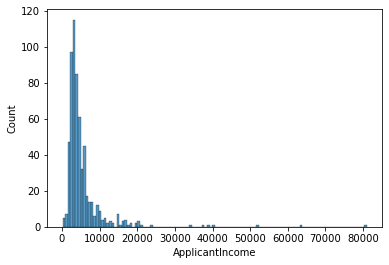

In [8]:
sns.histplot(data= data_creditos, x = 'ApplicantIncome')

In [9]:
data_creditos.shape

(614, 13)

In [10]:
data_creditos.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
porc_nulls = round(data_creditos.isnull().sum() * 100 / data_creditos.shape[0], 2).values
labels = data_creditos.columns.values

In [12]:
len(porc_nulls)

13

In [13]:
import matplotlib.pyplot as plt

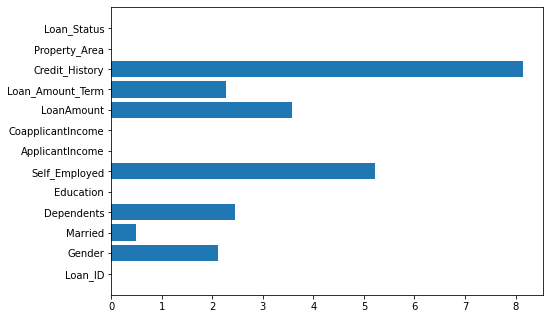

In [14]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = labels
students = porc_nulls
ax.barh(langs,students)
plt.show()

In [15]:
data_creditos.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [16]:
data_creditos.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001658,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [17]:
data_creditos['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [18]:
data_creditos['Loan_Status'] = data_creditos['Loan_Status'].map({'Y':0,'N':1})

In [19]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [20]:
data_creditos['Dependents'] = data_creditos['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = data_creditos.drop(['Loan_ID','Loan_Status'], axis=1)
y = data_creditos['Loan_Status']

In [33]:
# random state es la semilla
# stratify yes es para mantener la proporccion entre train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12345, stratify=y)

In [34]:
y.mean()

0.3127035830618892

In [35]:
y_train.mean()

0.3136456211812627

In [36]:
y_test.mean()

0.3089430894308943

# Imputacion de nulos

In [38]:
X_train.isnull().sum()

Gender               12
Married               3
Dependents           14
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
Property_Area         0
dtype: int64

In [40]:
# eliminamos registros con nulos en columnas
X_aux = X_train.dropna(subset=['LoanAmount','Loan_Amount_Term'])

In [41]:
X_aux.isnull().sum()

Gender               12
Married               2
Dependents           11
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       35
Property_Area         0
dtype: int64

In [42]:
X_train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [45]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [46]:
X_train_num.isnull().sum()

Dependents           14
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
dtype: int64

In [47]:
X_train_num.median()

Dependents              0.0
ApplicantIncome      3814.0
CoapplicantIncome    1086.0
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
imputer_num = SimpleImputer(strategy="median")

In [50]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

In [51]:
imputer_num.statistics_

array([0.000e+00, 3.814e+03, 1.086e+03, 1.280e+02, 3.600e+02, 1.000e+00])

In [52]:
imputer_num.transform(X_train_num)

array([[0.000e+00, 3.418e+03, 0.000e+00, 1.270e+02, 3.600e+02, 1.000e+00],
       [1.000e+00, 4.606e+03, 0.000e+00, 8.100e+01, 3.600e+02, 1.000e+00],
       [2.000e+00, 3.547e+03, 0.000e+00, 8.000e+01, 3.600e+02, 0.000e+00],
       ...,
       [0.000e+00, 3.727e+03, 1.775e+03, 1.310e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 5.116e+03, 1.451e+03, 1.650e+02, 3.600e+02, 0.000e+00],
       [0.000e+00, 6.096e+03, 0.000e+00, 2.180e+02, 3.600e+02, 0.000e+00]])

In [54]:
 X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns=X_train_num.columns)

In [55]:
X_train_num_imputed.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [56]:
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(data = imputer_cat.transform(X_train_cat), columns=X_train_cat.columns)

In [57]:
imputer_cat.statistics_

array(['Male', 'Yes', 'Graduate', 'No', 'Semiurban'], dtype=object)

In [58]:
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [62]:
X_train_num_imputed.describe(percentiles=[.01,.025,.05,.1,.25,.5,.75,.9,.925,.95,.975,.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
1%,0.000000,967.400000,0.000000,35.900000,84.000000,0.000000
2.5%,0.000000,1606.250000,0.000000,50.000000,180.000000,0.000000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

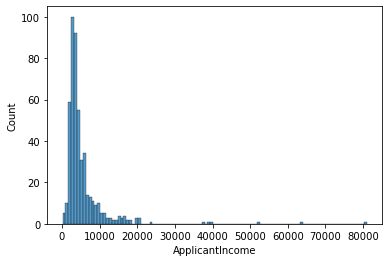

In [63]:
sns.histplot(data=X_train_num_imputed,x='ApplicantIncome')

In [66]:
X_train_num_imputed['log_Income'] = np.log10(X_train_num_imputed['ApplicantIncome'])

<AxesSubplot:xlabel='log_Income', ylabel='Count'>

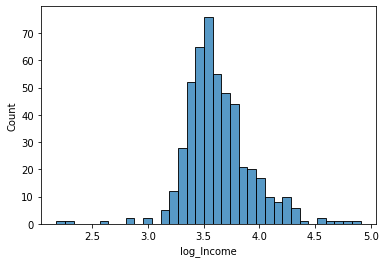

In [67]:
sns.histplot(data=X_train_num_imputed,x='log_Income')

In [69]:
p5_income = np.percentile(X_train_num_imputed['ApplicantIncome'],5)
p95_income = np.percentile(X_train_num_imputed['ApplicantIncome'],95)
p1_income = np.percentile(X_train_num_imputed['ApplicantIncome'],1)
p99_income = np.percentile(X_train_num_imputed['ApplicantIncome'],99)



In [70]:
X_train_num_imputed['ApplicantIncome_5'] = np.clip(X_train_num_imputed['ApplicantIncome'],p5_income,p95_income)
X_train_num_imputed['ApplicantIncome_1'] = np.clip(X_train_num_imputed['ApplicantIncome'],p1_income,p99_income)

<AxesSubplot:xlabel='ApplicantIncome_5', ylabel='Count'>

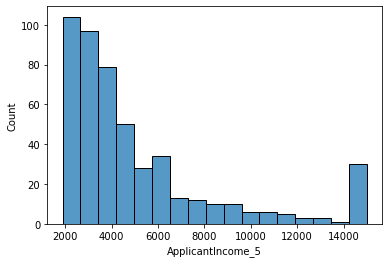

In [71]:
sns.histplot(data=X_train_num_imputed,x='ApplicantIncome_5')

<AxesSubplot:xlabel='ApplicantIncome_1', ylabel='Count'>

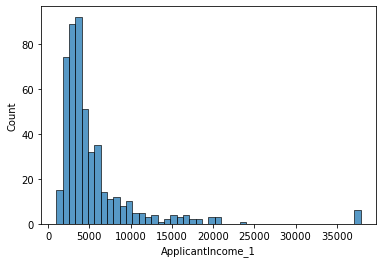

In [72]:
sns.histplot(data=X_train_num_imputed,x='ApplicantIncome_1')

In [73]:
# un criterio para imputar de manera automatica es hacer el comparativo por variable de que si el maximo valor y el percentil maximo observado es al menos el doble, entonces se imputa.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

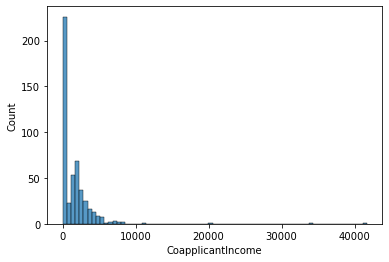

In [64]:
sns.histplot(data=X_train_num_imputed,x='CoapplicantIncome')

# Imputacion categoricas

In [76]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed,drop_first=True).head()

# Consolidacion

In [78]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0.0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1.0,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural


In [79]:
X_train_num_imputed.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0


In [80]:
X_train_cat_dummies.head(2)

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,0
1,0,0,1,0,0,0


In [81]:
X_train_consolidado = pd.concat([X_train_num_imputed,X_train_cat_dummies],axis=1)

In [83]:
X_train_consolidado.shape

(491, 15)

In [84]:
X_train_consolidado.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0,0.0,0.0,1.0,0.0,0.0,0.0


# Estandarizacion

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
scaler.fit(X_train_consolidado)

MinMaxScaler()

In [88]:
X_train_scaled = pd.DataFrame(data = scaler.transform(X_train_consolidado),columns=X_train_consolidado.columns)

In [89]:
X_train_scaled.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.040421,0.0,0.170767,0.72973,1.0,0.496883,0.116894,0.066422,1.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.055114,0.0,0.104197,0.72973,1.0,0.544297,0.207480,0.098622,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='log_Income', ylabel='Count'>

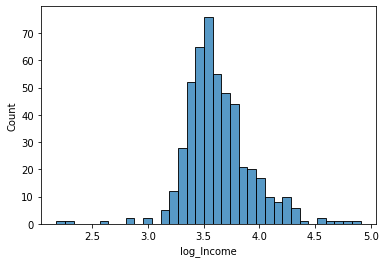

In [90]:
sns.histplot(data=X_train_consolidado,x='log_Income')

<AxesSubplot:xlabel='log_Income', ylabel='Count'>

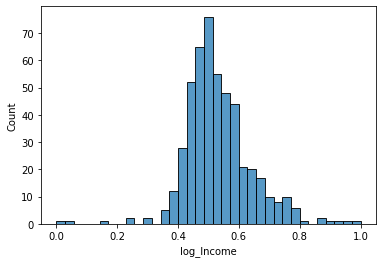

In [91]:
sns.histplot(data=X_train_scaled,x='log_Income')